## Project II - Programming for Data Analysis
****
### Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset. The following list presents the
requirements of the project
- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- Document your work in a Jupyter notebook.
- As a suggestion, you could use Pandas, Seaborn, SKLearn, etc. to perform your analysis.
- Please use GitHub to demonstrate research, progress and consistency
****

#### Dataset Information

For this project I am using the original Wisconsin Breast Cancerdataset imported from UCI machine learning repository. This is a multivariate classification dataset, which records the measurements for breast cancer cases. There are two classes; benign and malignant, denoted by numbers 2 and 4 respectively. The malignant class of this dataset is considered as outliers, while points in the benign class are considered inliers. There are 699 samples that have 11 attributes with 19 missing values. The 9 other attributes are ranged from 1 to 10. Pathologists assigned these numbers based on their characteristics. See tables below for initial informaiton on the dataset.

There has been numerous research works done on this dataset with the aim to be able to predict the liklihood of breast cancer in patients.   

In [6]:
import pandas as pd
import seaborn as sns
import sklearn as sk

In [7]:
# importing the Wisconsin Breast Cancer dataset from UCI Machine Learning Repository using Pandas
# note we are missing column names so I need to add these in using names function and taking names from attributes section on UCI website
# naming dataset "wbc" using initials of the dataset

wbc = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                 names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

In [8]:
wbc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
wbc.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [11]:
# to determine no. of rows and no. of columns
wbc.shape

(699, 11)

In [14]:
wbc.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

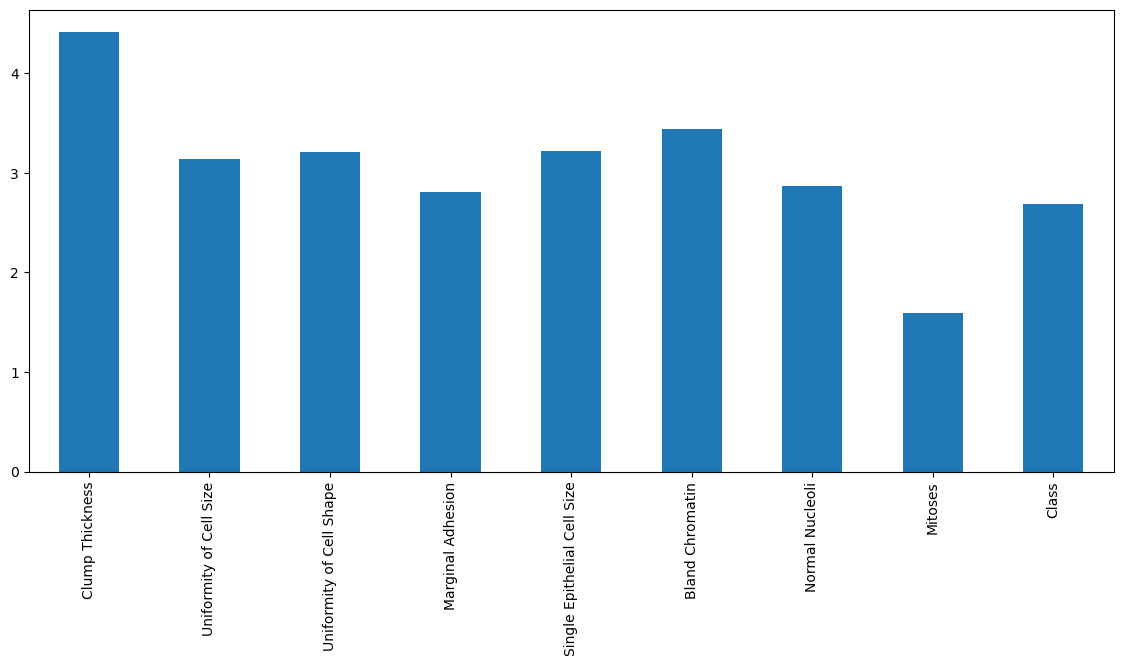

In [10]:
#drop first column as it contains sample numbers and not attributes
wbc.drop(columns = wbc.columns[0], axis = 1, inplace= True)
data_mean = wbc.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6))


****
#### Classifiers

Breast cancer is an unfortunately very common disease with ongoing research being done with the aim to amend the outcome for patients from a terminal illness to a treatable illness.

Current statistics in Ireland:
- One in nine women will develop breast cancer in the course of their lifetime.
- Incidence of male breast cancer is one in 1000.
- We have 3,700 new cases of breast cancer diagnosed each year.
- 23% of women are diagnosed between the ages of 20-50 years.
- 34% of women are diagnosed between the ages of 50-69 years.
- 36% of women are diagnosed over the age of 70 years.
- Only 5%-10% of breast cancer cases are hereditary.

 __[Breast Cancer Ireland](https://www.breastcancerireland.com/education-awareness/facts-and-figures/)__
 
 Using machine learning methods is an effective way to classify data, and interest in the application of machine learning to the design, conduct, and analysis of clinical trials has grown. Machine learning has the potential to help improve the success, generalizability, patient-centeredness, and efficiency of clinical trials. __[The role of machine learning in clinical research: transforming the future of evidence generation](https://trialsjournal.biomedcentral.com/articles/10.1186/s13063-021-05489-x)__
In our dataset we have 19 missing values and machine learning can be used in several different ways to address the problem of missing data but it is better in collection of new data sets to use it to ensure a reduction in errors when collecting the data during research.

A very effective use of machine learning is to generate risk predictions in retrospective datasets that can be considered in future research and a big part of that is classification.

The random forest is a classification algorithm consisting of many decisions trees. Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.__[Random Forest}(https://en.wikipedia.org/wiki/Random_forest)__.
 
 